### 任务目标
- 数据目标
    分割颜色
- 代码目标
    修改代码创建一个二分的模型


In [1]:


## 导入基础库
import numpy as np
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

/var/folders/03/q7g98x3967ld2pm23pmrkp7h0000gn/T/ipykernel_2507/1423135977.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


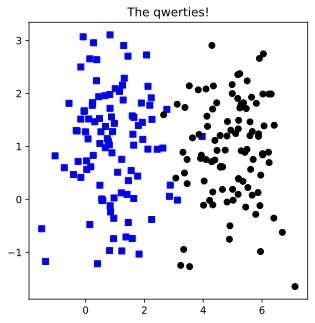

In [3]:

nPerClust = 100
blur =1

A = [1,1]

B = [5,1]

a = [A[0] + np.random.randn(nPerClust) * blur, A[1] + np.random.randn(nPerClust) *blur]

b = [B[0] + np.random.randn(nPerClust) * blur, B[1] + np.random.randn(nPerClust) *blur]

labels_np = np.vstack((np.zeros((nPerClust,1)), np.ones((nPerClust,1))))


data_np = np.hstack((a,b)).T

# 转化成 pytorch tensor 类型
data= torch.tensor(data_np).float()
labels = torch.tensor(labels_np).float()

# 展示

fig = plt.figure(figsize=(5,5))

plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.title('The qwerties!')
plt.show()



In [6]:
data
torch.tensor([1,2]).shape

torch.Size([2])

In [9]:
a

[array([ 2.07280754,  2.55831526,  0.25911462,  1.37750251,  1.23174842,
         0.70774052,  0.95582805,  1.5223516 ,  0.56630262,  0.31569523,
        -0.05196246,  1.15474635, -0.4679908 ,  1.102383  ,  1.72290808,
         0.94945178,  2.29131369,  0.53300012,  1.49938559,  3.88870519,
         0.33635375, -0.24008962,  0.69230256,  0.37273527,  0.55425949,
        -0.95455554, -0.18606987, -0.17279421,  0.95660676,  1.12608273,
         0.50636191,  1.9674345 ,  1.5657156 , -0.16317509,  0.4053824 ,
         0.7933166 ,  3.55252985,  2.16586135,  0.03574763,  3.67627865,
         0.49750478,  0.54140086,  2.28597248,  1.53439983,  0.06190701,
         1.06704558,  1.34804906,  1.14757312,  0.57459026,  0.54292345,
         1.23261065,  0.10488815,  0.30126802,  1.25095064,  2.62544896,
        -0.25371981,  1.58602803,  2.90694673,  0.04459059,  1.4404397 ,
         0.35607036,  1.99410771,  2.33794595,  0.76025319,  1.12498074,
         0.73809597,  2.89822493,  0.84955043,  0.7

In [10]:

ANNClassify = nn.Sequential(
    nn.Linear(2,1),
    nn.ReLU(),
    nn.Linear(1,1),
    nn.Sigmoid()
)

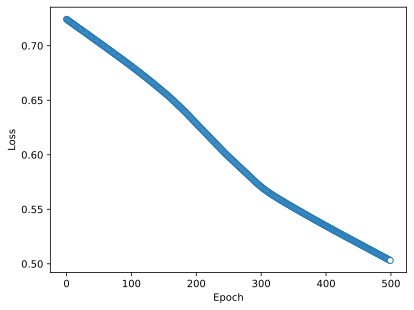

In [11]:

learningRate = .01

lossFun = nn.BCELoss()

optimizer = torch.optim.SGD(ANNClassify.parameters(),lr=learningRate)



# 训练
numepochs = 500
losses = torch.zeros(numepochs)

for epochi in range(numepochs):
    # forward pass
    yHat = ANNClassify(data)
    loss = lossFun(yHat, labels)
    losses[epochi] = loss

    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


# show the losses

plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


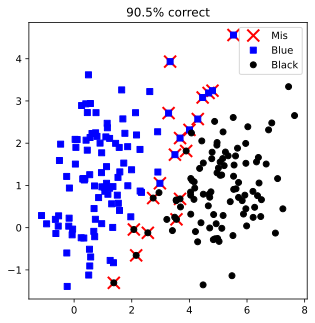

In [12]:

# 用模型预测结果
predictions = ANNClassify(data)
# print(predictions)

# 把 大于.5 筛选出来
predabels = predictions > .5

# 对比2个数组中相同位置元素的值是否不一样，返回值不易的索引
# [1,2,3,4]  [1,2,3,5] => [3]
missclassified = np.where(predabels != labels)[0]

totalacc = 100 - 100*len(missclassified) / (2*nPerClust)

fig = plt.figure(figsize=(5, 5))


plt.plot(data[missclassified, 0], data[missclassified, 1],
         'rx', markersize=12, markeredgewidth=2)

plt.plot(data[np.where(~predabels)[0], 0],
         data[np.where(~predabels)[0], 1], 'bs')
plt.plot(data[np.where(predabels)[0], 0],
         data[np.where(predabels)[0], 1], 'ko')

plt.legend(['Mis', 'Blue', 'Black'], bbox_to_anchor=(1, 1))

plt.title(f'{totalacc}% correct')

plt.show()